In [0]:
install.packages('igraph')
install.packages('tictoc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



IGRAPH 9c8042b DN-- 156 1476 -- 
+ attr: name (v/c), Directed (e/c), X6004 (e/n), X (e/l), X.1 (e/l),
| X1.1 (e/n)


[1] 9.461538

degree: 0.006 sec elapsed


[1] 211.5577

betweenness: 0.011 sec elapsed


Warning message in closeness(g):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”


[1] 0.001936987

closeness: 0.01 sec elapsed


[1] 0.07862308

global clustering coefficient: 0.007 sec elapsed


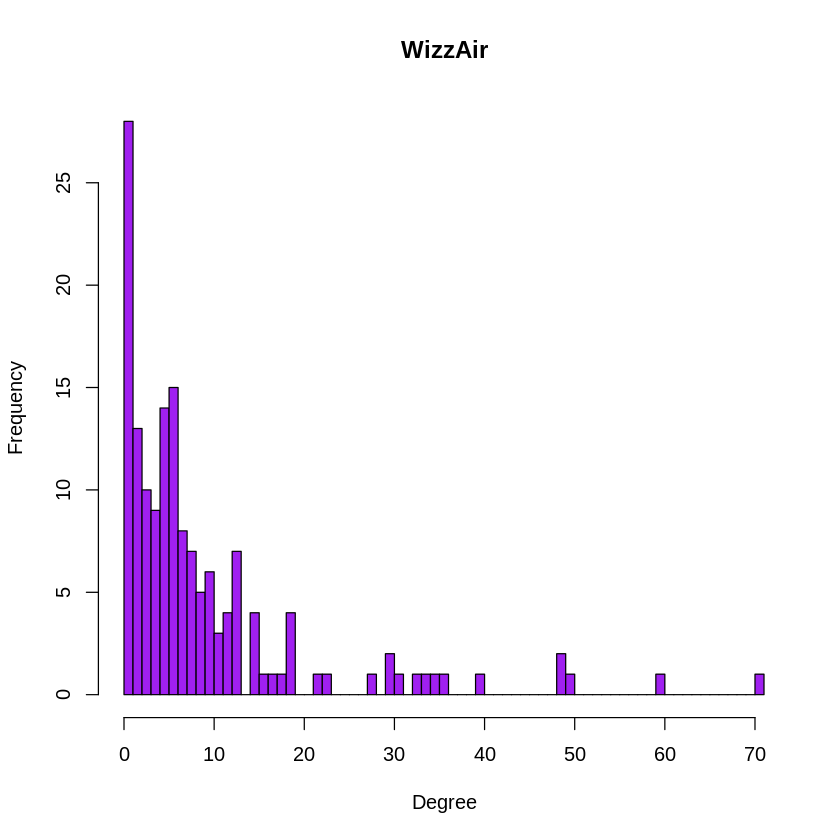

local clustering coefficient: 0.061 sec elapsed


[1] 0.006410256

page rank: 0.007 sec elapsed


[1] 2.373694

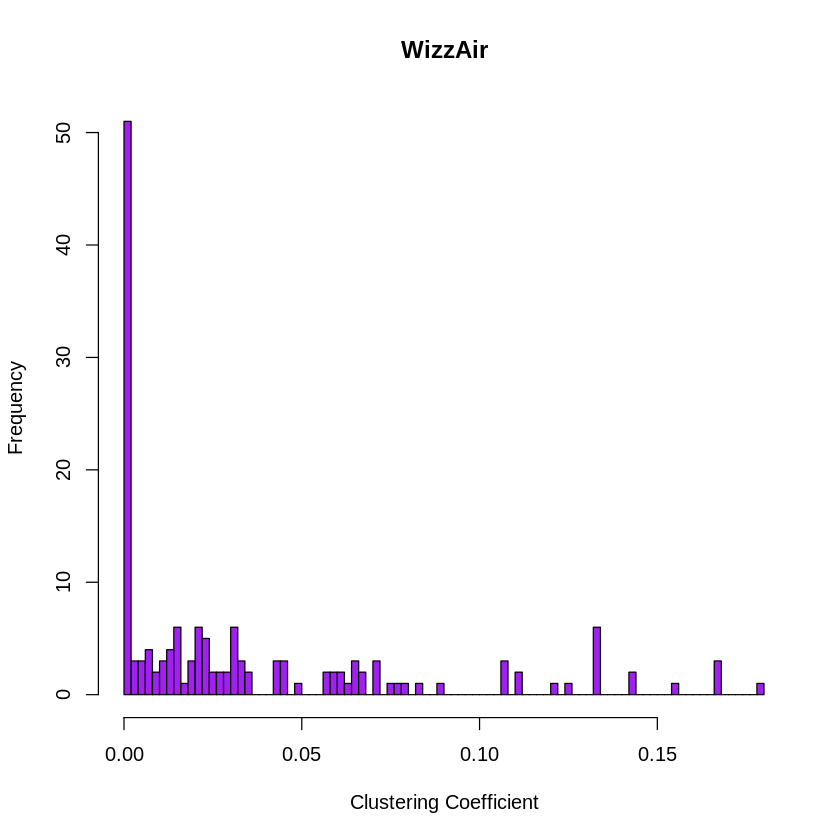

shortest paths1: 0.073 sec elapsed


[1] 4

diameter: 0.006 sec elapsed


[1] 1

connected components: 0.006 sec elapsed


[1] 0.06104218

edge density: 0.005 sec elapsed
total: 0.243 sec elapsed


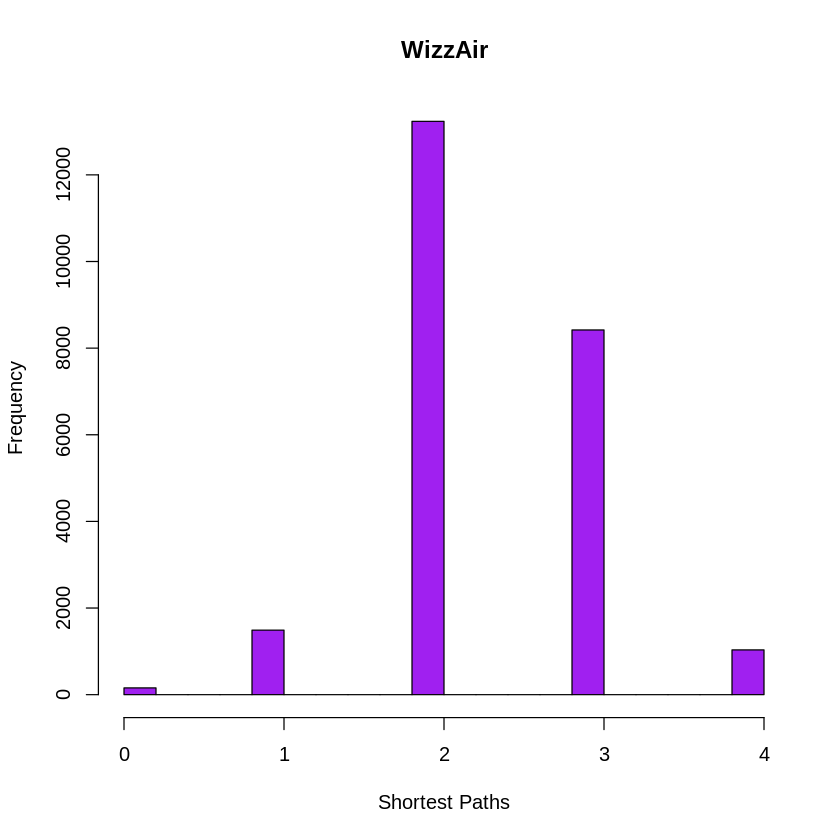

In [0]:
library(igraph)
library(tictoc)

COLOR="purple"

FILE_NAME="edges_removed_duplicates.csv"
DATA_NAME="WizzAir"
DIRECTED=TRUE

dfGraph <- read.csv2(FILE_NAME, skip=1, sep= ",")
g <- graph.data.frame(dfGraph)
summary(g)

# degree, betweenness, closeness, clustering
# coefficient, pagerank, shorthest paths, diameter, number
# of connected components, network density


tic("total")
tic("degree")
deg = degree(g, mode="in")
mean(deg)
toc()
hist(deg,
       breaks=100,
       col=COLOR,
       lwd=1,
       xlab="Degree",
       ylab = "Frequency",
       main=DATA_NAME)


tic("betweenness")
betw = betweenness(g, directed=DIRECTED)
mean(betw) 
toc()


tic("closeness")
closs = closeness(g)
mean(closs)
toc()


tic("global clustering coefficient")
g_trans = transitivity(g, type="global")
g_trans
toc()


tic("local clustering coefficient")
l_trans = transitivity(g, type="local")
hist(l_trans,
       col=COLOR,
       xlab="Clustering Coefficient",
       ylab = "Frequency",
       breaks=100,
       main=DATA_NAME)
toc()



tic("page rank")
mean(page_rank(g)$vector, directed=DIRECTED)
toc()


tic("shortest paths1")
dist = distances(g)
mean_distance(g, directed=DIRECTED)
hist(dist,
       col=COLOR,
       xlab="Shortest Paths",
       ylab = "Frequency",
       main=DATA_NAME)
toc()


tic("diameter")
diameter(g, directed=DIRECTED)
toc()


tic('connected components')
no.clusters(g)
toc()


tic("edge density")
edge_density(g)
toc()
toc()

# plot(g, edge.color="red", vertex.color="blue", vertex.size=0.1, vertex.label=NA, edge.arrow.mode=0, layout=layout_nicely)
# plot(g, edge.color="red", vertex.color="blue", vertex.size=3, vertex.label=NA, edge.arrow.mode=0, layout=layout_with_drl)
